In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv("AmesHousing.csv")
dataset.head()
dataset.info

<bound method DataFrame.info of       Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Al

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

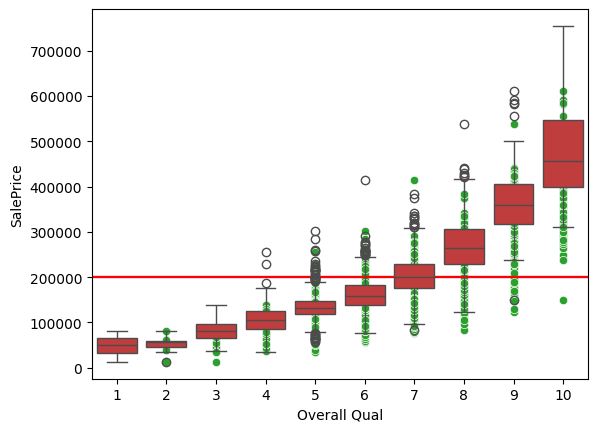

In [3]:
#Dealing with outliers
pd.DataFrame([dataset.corr(numeric_only=True)['SalePrice'].sort_values()])

sns.scatterplot(data=dataset, x='Overall Qual', y='SalePrice')
plt.axhline(y=200000,color='r')
dataset[(dataset['Overall Qual']>8) &(dataset['SalePrice']<200000)][['SalePrice', 'Overall Qual']]
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=dataset)
plt.axhline(y=200000, color='r')
plt.axvline(x=4000, color='r')
dataset[(dataset['Gr Liv Area']>4000) & (dataset['SalePrice']<400000)][['SalePrice', 'Gr Liv Area']]
dataset_total =dataset
index_drop=dataset[(dataset['Gr Liv Area']>4000) & (dataset['SalePrice']<400000)].index
dataset=dataset.drop(index_drop, axis=0)
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=dataset_total, color='red')

sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=dataset, color='green')
plt.axhline(y=200000, color='m')
plt.axvline(x=4000, color='m')
sns.scatterplot(x='Overall Qual', y='SalePrice', data=dataset)
plt.axhline(y=200000,color='r')
sns.boxplot(x='Overall Qual', y='SalePrice', data=dataset)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'Electrical'),
  Text(1, 0, 'Garage Cars'),
  Text(2, 0, 'BsmtFin SF 1'),
  Text(3, 0, 'Garage Area'),
  Text(4, 0, 'BsmtFin SF 2'),
  Text(5, 0, 'Bsmt Unf SF'),
  Text(6, 0, 'Total Bsmt SF'),
  Text(7, 0, 'Bsmt Half Bath'),
  Text(8, 0, 'Bsmt Full Bath'),
  Text(9, 0, 'Mas Vnr Area'),
  Text(10, 0, 'Bsmt Qual'),
  Text(11, 0, 'Bsmt Cond'),
  Text(12, 0, 'BsmtFin Type 1'),
  Text(13, 0, 'BsmtFin Type 2'),
  Text(14, 0, 'Bsmt Exposure'),
  Text(15, 0, 'Garage Type'),
  Text(16, 0, 'Garage Qual'),
  Text(17, 0, 'Garage Cond'),
  Text(18, 0, 'Garage Yr Blt'),
  Text(19, 0, 'Garage Finish'),
  Text(20, 0, 'Lot Frontage'),
  Text(21, 0, 'Fireplace Qu'),
  Text(22, 0, 'Mas Vnr Type'),
  Text(23, 0, 'Fence'),
  Text(24, 0, 'Alley'),
  Text(25, 0, 'Misc Feature'),
  Text(26, 0, 'Pool QC')])

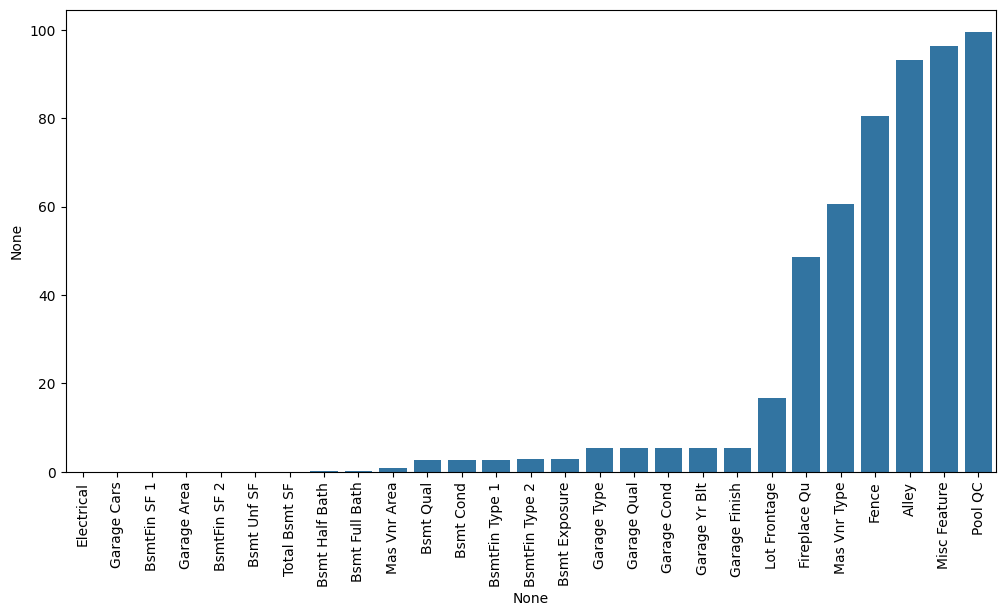

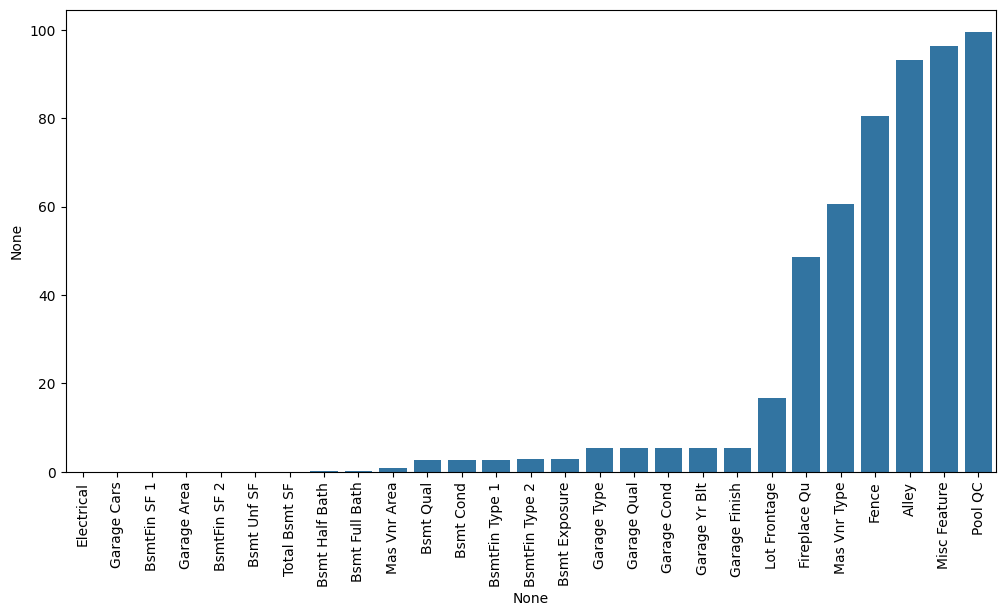

In [4]:
#Dealing with missing data
dataset.head()
dataset= dataset.drop('PID', axis=1)
dataset.head()
dataset.isnull()
dataset.isnull().sum()
100 * (dataset.isnull().sum()/len(dataset))
def missing_percent(df):
    nan_percent= 100*(df.isnull().sum()/len(df))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent
nan_percent= missing_percent(dataset)

nan_percent
plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)
plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1342,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,1498,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


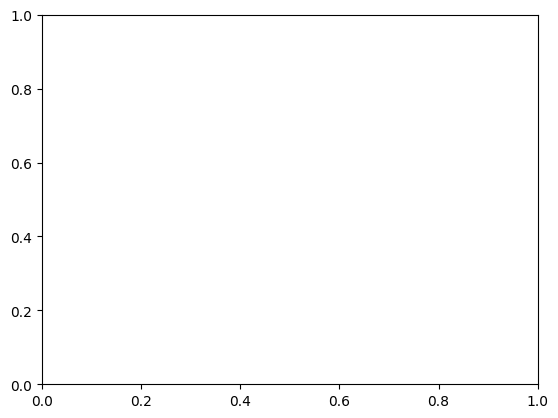

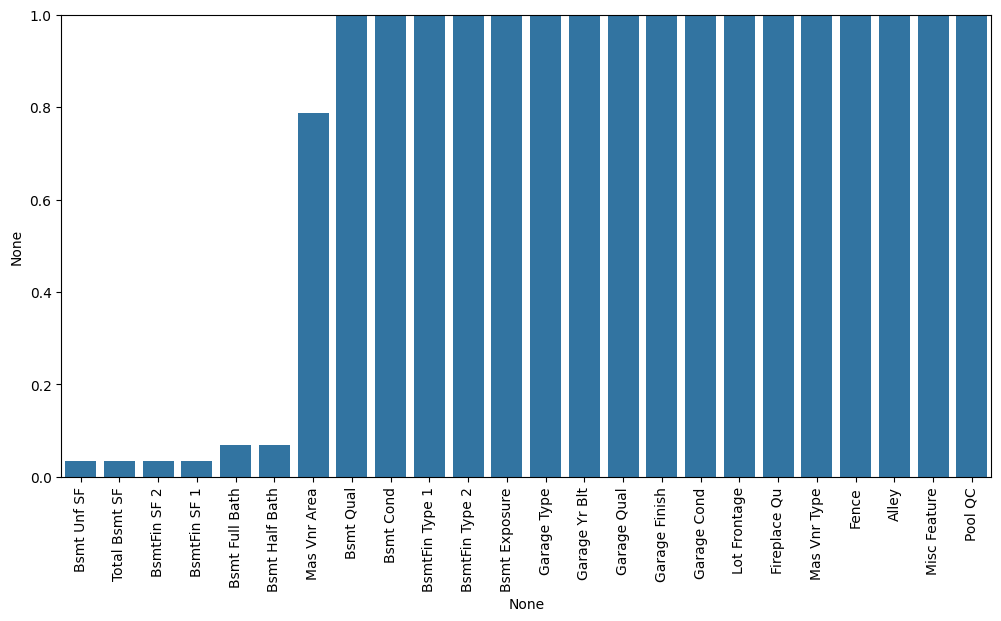

In [5]:
#Set 1% threshold:
plt.ylim(0,1)
nan_percent[nan_percent < 1]

nan_percent[nan_percent<1].index

100/len(dataset)
dataset[dataset['Electrical'].isnull()]
dataset[dataset['Garage Area'].isnull()]
dataset= dataset.dropna(axis=0, subset=['Electrical', 'Garage Area'])

nan_percent= missing_percent(dataset)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)
plt.ylim(0,1)
dataset[dataset['Total Bsmt SF'].isnull()]
dataset[dataset['Bsmt Half Bath'].isnull()]

dataset[dataset['Bsmt Full Bath'].isnull()]


In [6]:
#Numerical Columns fill with 0:
bsmt_num_cols= ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF' ,'Bsmt Full Bath', 'Bsmt Half Bath']
dataset[bsmt_num_cols]=dataset[bsmt_num_cols].fillna(0)

,Garage Type,Garage Yr Blt,Garage Finish,Garage Qual,Garage Cond
0,Attchd,1960.0,Fin,TA,TA
1,Attchd,1961.0,Unf,TA,TA
2,Attchd,1958.0,Unf,TA,TA
3,Attchd,1968.0,Fin,TA,TA
4,Attchd,1997.0,Fin,TA,TA
...,...,...,...,...,...
2925,Detchd,1984.0,Unf,TA,TA
2926,Attchd,1983.0,Unf,TA,TA
2927,NaN,NaN,NaN,NaN,NaN
2928,Attchd,1975.0,RFn,TA,TA


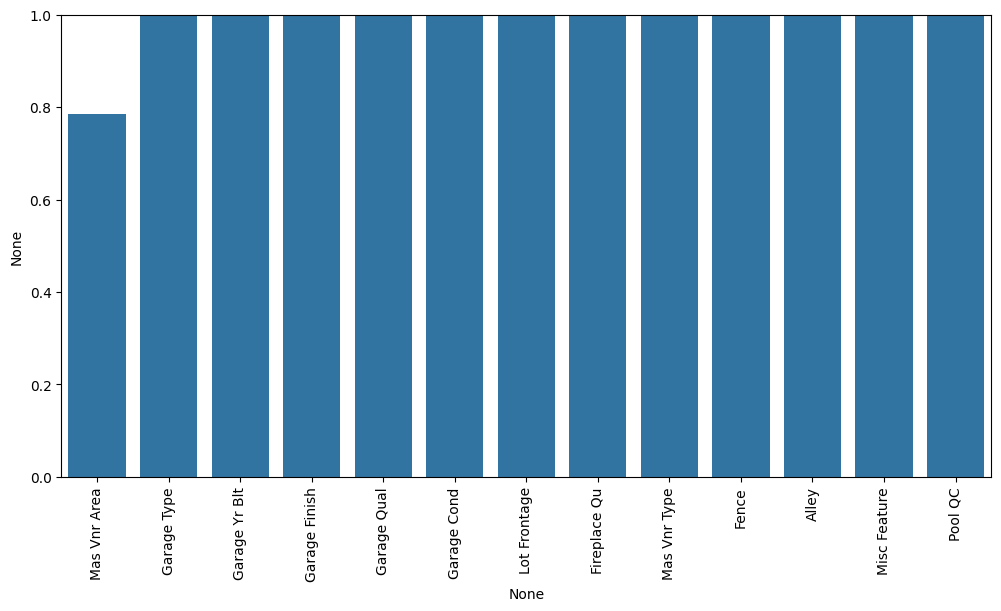

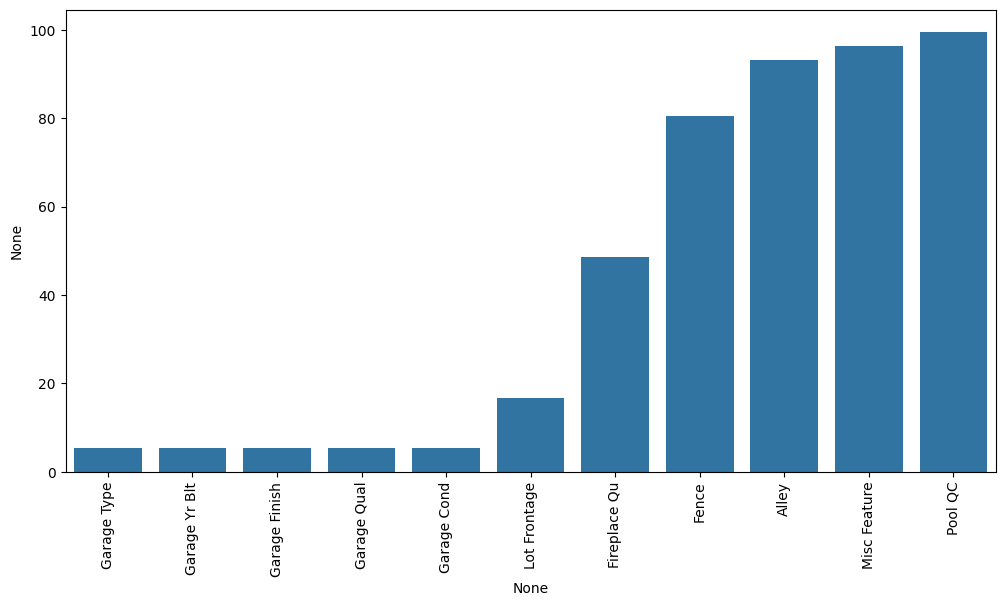

In [7]:
#String Columns fill with None:
bsmt_str_cols= ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
dataset[bsmt_str_cols]= dataset[bsmt_str_cols].fillna('None')
nan_percent= missing_percent(dataset)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)
plt.ylim(0,1)
dataset["Mas Vnr Type"]= dataset["Mas Vnr Type"].fillna("None")
dataset["Mas Vnr Area"]= dataset["Mas Vnr Area"].fillna(0)
nan_percent= missing_percent(dataset)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)
dataset[['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2925 non-null   int64  
 1   MS SubClass      2925 non-null   int64  
 2   MS Zoning        2925 non-null   object 
 3   Lot Frontage     2925 non-null   float64
 4   Lot Area         2925 non-null   int64  
 5   Street           2925 non-null   object 
 6   Lot Shape        2925 non-null   object 
 7   Land Contour     2925 non-null   object 
 8   Utilities        2925 non-null   object 
 9   Lot Config       2925 non-null   object 
 10  Land Slope       2925 non-null   object 
 11  Neighborhood     2925 non-null   object 
 12  Condition 1      2925 non-null   object 
 13  Condition 2      2925 non-null   object 
 14  Bldg Type        2925 non-null   object 
 15  House Style      2925 non-null   object 
 16  Overall Qual     2925 non-null   int64  
 17  Overall Cond     29

,Order,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1,2,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,False,False,True,False,False,False,True,False
2,3,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,4,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,False,False,False,False,True,False,False,False,True,False
4,5,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,False,False,True,False,False,False,True,False


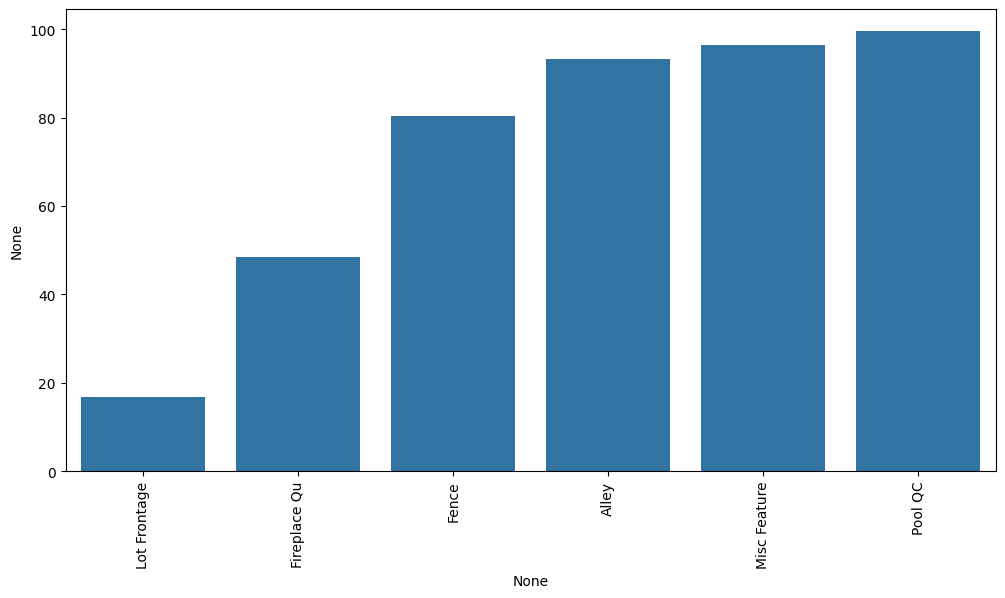

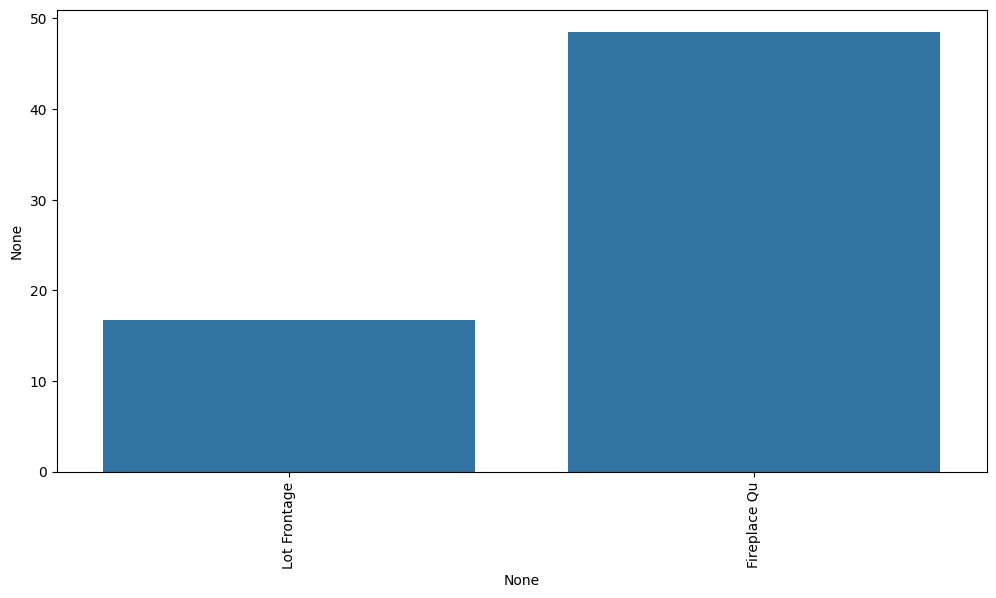

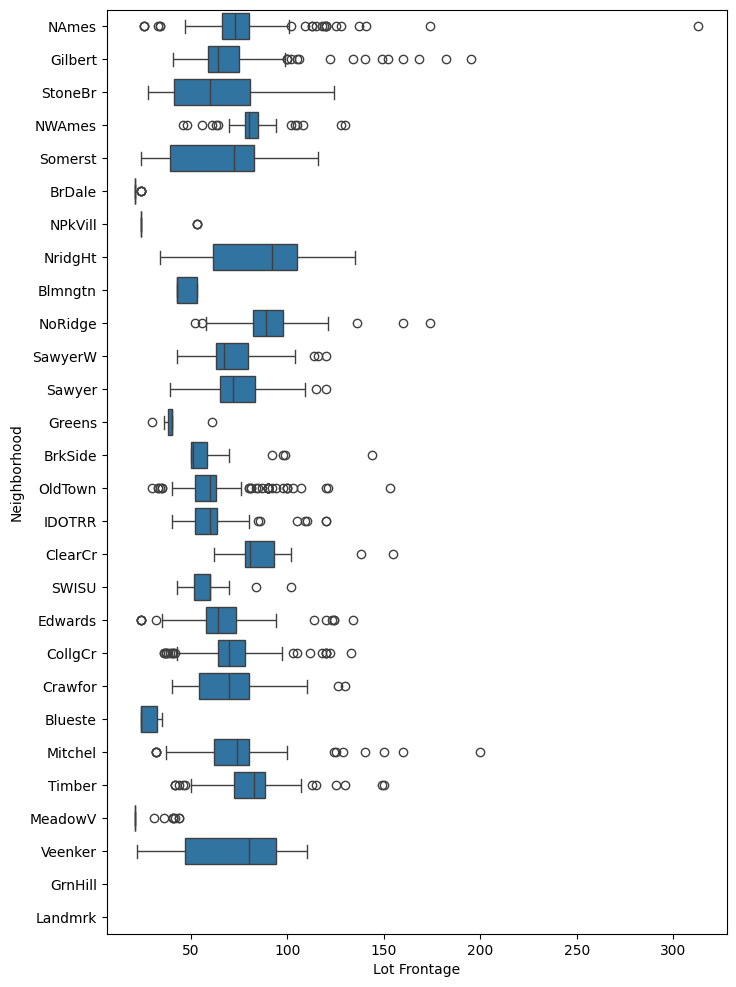

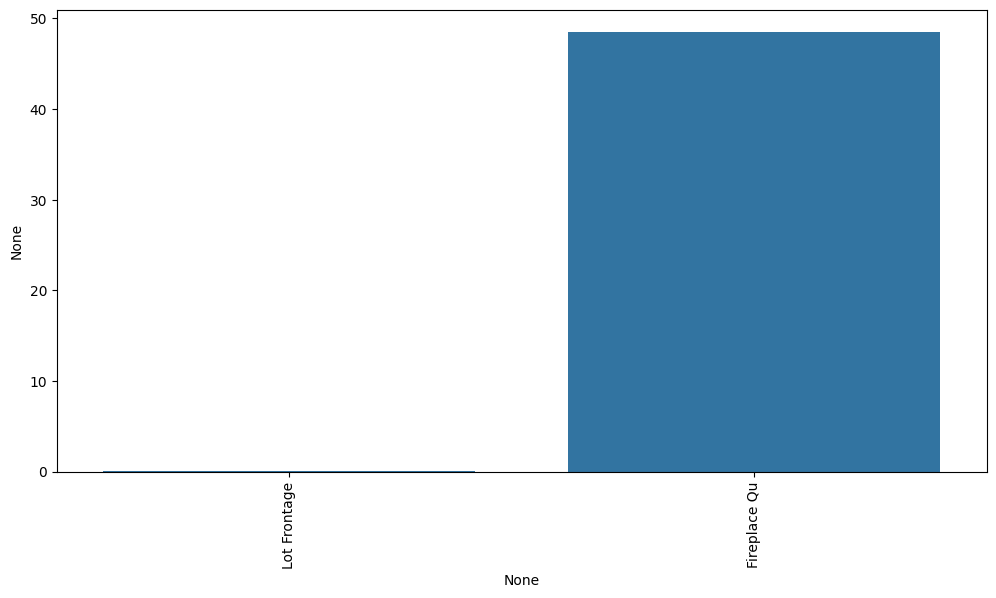

In [8]:
#Filling the missing Value:
Gar_str_cols= ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
dataset[Gar_str_cols]=dataset[Gar_str_cols].fillna('None')

dataset['Garage Yr Blt']=dataset['Garage Yr Blt'].fillna(0)
nan_percent= missing_percent(dataset)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)
nan_percent.index

dataset[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC']]
dataset= dataset.drop(['Fence', 'Alley', 'Misc Feature','Pool QC'], axis=1)

nan_percent= missing_percent(dataset)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)
dataset['Neighborhood'].unique()
plt.figure(figsize=(8,12))
sns.boxplot(data=dataset, x='Lot Frontage', y='Neighborhood')
dataset.groupby('Neighborhood')['Lot Frontage']
dataset.groupby('Neighborhood')['Lot Frontage'].mean()
dataset.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))
dataset['Lot Frontage']=dataset.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))
nan_percent= missing_percent(dataset)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)
dataset['Lot Frontage']= dataset['Lot Frontage'].fillna(0)
nan_percent= missing_percent(dataset)
nan_percent


dataset['MS SubClass']
dataset.info()
dataset['MS SubClass'].unique()
dataset['MS SubClass'] = dataset['MS SubClass'].apply(str)
dataset['MS SubClass']
dataset.select_dtypes(include='object')
dataset_num = dataset.select_dtypes(exclude='object')
dataset_obj = dataset.select_dtypes(include='object')
dataset_num.info()
dataset_obj.info()
dataset_obj = pd.get_dummies(dataset_obj, drop_first=True)
dataset_obj.shape
dataset_num.head()
finaldata = pd.concat([dataset_num, dataset_obj], axis=1)
finaldata.head()